# Data Processing Notebook 

In [1]:
import pickle

In [2]:
x =pickle.load(open("X2.pkl", "rb"))
y =pickle.load(open("Y2.pkl", "rb"))


In [3]:

x=x/255

In [4]:
x

array([[[[0.74117647, 0.78431373, 0.79215686],
         [0.75294118, 0.79607843, 0.80392157],
         [0.75294118, 0.79607843, 0.80392157],
         ...,
         [0.8627451 , 0.89803922, 0.88627451],
         [0.87058824, 0.90588235, 0.89411765],
         [0.8745098 , 0.90980392, 0.89803922]],

        [[0.76470588, 0.80392157, 0.81568627],
         [0.76078431, 0.80392157, 0.81176471],
         [0.75686275, 0.8       , 0.80784314],
         ...,
         [0.86666667, 0.90196078, 0.89019608],
         [0.8627451 , 0.89803922, 0.88627451],
         [0.85490196, 0.89803922, 0.88627451]],

        [[0.76078431, 0.8       , 0.81176471],
         [0.76078431, 0.80392157, 0.81176471],
         [0.75294118, 0.79607843, 0.80392157],
         ...,
         [0.8745098 , 0.90980392, 0.89803922],
         [0.87058824, 0.90588235, 0.89411765],
         [0.84313725, 0.88627451, 0.87058824]],

        ...,

        [[0.67843137, 0.68627451, 0.63529412],
         [0.5254902 , 0.51372549, 0.47843137]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [6]:
X_train 

array([[[[0.20392157, 0.23137255, 0.19215686],
         [0.2       , 0.23137255, 0.18039216],
         [0.18823529, 0.20784314, 0.18039216],
         ...,
         [0.98431373, 0.98431373, 0.98431373],
         [0.98431373, 0.98431373, 0.98431373],
         [0.98823529, 0.98823529, 0.98823529]],

        [[0.22745098, 0.25490196, 0.22352941],
         [0.18431373, 0.20784314, 0.16862745],
         [0.22352941, 0.24705882, 0.2       ],
         ...,
         [0.97254902, 0.97254902, 0.97254902],
         [0.98039216, 0.98039216, 0.98039216],
         [0.98823529, 0.98823529, 0.98823529]],

        [[0.18431373, 0.20392157, 0.16470588],
         [0.21568627, 0.23529412, 0.21176471],
         [0.25882353, 0.29019608, 0.24705882],
         ...,
         [0.97254902, 0.97254902, 0.97254902],
         [0.98039216, 0.98039216, 0.98039216],
         [0.98039216, 0.98039216, 0.98039216]],

        ...,

        [[0.08627451, 0.09019608, 0.09803922],
         [0.0745098 , 0.07843137, 0.09411765]

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 

In [13]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())

model.add(Dense(128,input_shape = x.shape[1:], activation='relu'))
model.add(Dense(6,activation="softmax"))


In [16]:
input_shape = x.shape  
model.build(input_shape) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (2032, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (2032, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (2032, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (2032, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (2032, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (2032, 10, 10, 64)      

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [13]:
final = model.fit(X_train, y_train, epochs=25,validation_split=0.1)


Epoch 1/25
29/29 [==============================] - 66s 2s/step - loss: 1.6117 - accuracy: 0.2095 - val_loss: 1.5314 - val_accuracy: 0.4369
Epoch 2/25
29/29 [==============================] - 57s 2s/step - loss: 1.5459 - accuracy: 0.2981 - val_loss: 1.4783 - val_accuracy: 0.3981
Epoch 3/25
29/29 [==============================] - 52s 2s/step - loss: 1.4650 - accuracy: 0.3629 - val_loss: 1.5161 - val_accuracy: 0.3301
Epoch 4/25
29/29 [==============================] - 56s 2s/step - loss: 1.3648 - accuracy: 0.4190 - val_loss: 1.5224 - val_accuracy: 0.4078
Epoch 5/25
29/29 [==============================] - 57s 2s/step - loss: 1.2664 - accuracy: 0.4698 - val_loss: 1.4111 - val_accuracy: 0.3883
Epoch 6/25
29/29 [==============================] - 59s 2s/step - loss: 1.1502 - accuracy: 0.5346 - val_loss: 1.6012 - val_accuracy: 0.3592
Epoch 7/25
29/29 [==============================] - 58s 2s/step - loss: 1.0515 - accuracy: 0.5799 - val_loss: 1.6577 - val_accuracy: 0.3981
Epoch 8/25
29/29 [==

In [18]:
# pickle.dump(final, open("Vehicledetection.pkl", "wb"))

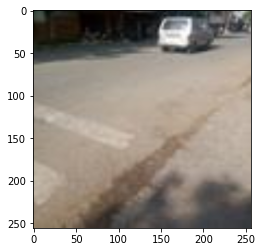

1/1 [==============================] - 0s 42ms/step
Predicted Vehicle: Tractor


In [52]:
import random
import matplotlib.pyplot as plt
import cv2
idx2 = random.randint(0, len(y_test)-1)
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(x[idx2, :].reshape(1, 256, 256, 3))
y_pred = y_pred > 0.5
y_pred
list_pred = y_pred.tolist()
list1 = list_pred[0]
if list1[0] == True and list1[1] == False and list1[2] == False and list1[3] == False and list1[4] == False:
    print("Predicted Vehicle: Auto")
elif list1[0] == False and list1[1] == True   and list1[2] == False and list1[3] == False and list1[4] == False:
    print("Predicted Vehicle: Bus")
elif list1[0] == False and list1[1] == False and list1[2] == True and list1[3] == False and list1[4] == False:
    print("Predicted Vehicle: Tempo")
elif list1[0] == False and list1[1] == False and list1[2] == False and list1[3] == True and list1[4] == False:
    print("Predicted Vehicle: Tractor")
elif list1[0] == False and list1[1] == False and list1[2] == False and list1[3] == False and list1[4] == True:
    print("Predicted Vehicle: Truck")
else:
    print("Predicted Vehicle: Don't Know")


# Testing

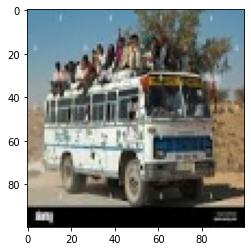

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/dense/Relu' defined at (most recent call last):
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\LENOVO\AppData\Local\Temp\ipykernel_33612\2031258655.py", line 11, in <cell line: 11>
      y_pred1 = model.predict(x1[idx21, :].reshape(1, 100, 100, 3))
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\core\dense.py", line 235, in call
      outputs = self.activation(outputs)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\activations.py", line 311, in relu
      return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 4992, in relu
      x = tf.nn.relu(x)
Node: 'sequential/dense/Relu'
Matrix size-incompatible: In[0]: [1,1024], In[1]: [12544,128]
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_predict_function_6603]

In [40]:
x1 = pickle.load(open("X1.pkl", "rb"))
y1 = pickle.load(open("Y1.pkl", "rb"))
x1=x1/255
import random
import matplotlib.pyplot as plt
import cv2
idx21 = random.randint(0, len(y1)-1)
plt.imshow(x1[idx21, :])
plt.show()

y_pred1 = model.predict(x1[idx21, :].reshape(1, , 100, 3))
y_pred1 = y_pred1 > 0.5
y_pred1
list_pred = y_pred1.tolist()
list1 = list_pred[0]
if list1[0] == True and list1[1] == False and list1[2] == False and list1[3] == False and list1[4] == False:
    print("Predicted Vehicle: Auto")
elif list1[0] == False and list1[1] == True   and list1[2] == False and list1[3] == False and list1[4] == False:
    print("Predicted Vehicle: Bus")
elif list1[0] == False and list1[1] == False and list1[2] == True and list1[3] == False and list1[4] == False:
    print("Predicted Vehicle: Tempo")
elif list1[0] == False and list1[1] == False and list1[2] == False and list1[3] == True and list1[4] == False:
    print("Predicted Vehicle: Tractor")
elif list1[0] == False and list1[1] == False and list1[2] == False and list1[3] == False and list1[4] == True:
    print("Predicted Vehicle: Truck")
else:
    print("Predicted Vehicle: Don't Know")
